# Finance Theory with real-world data

Modern portfolio theory using real-world data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import yfinance as yf


## Data preparation

In [2]:
# Fetch 20 years of data from Yahoo Finance
stocks = yf.download("T MCD PEP XOM JPM ABT CAT AAPL EMN O DUK", start="2001-01-01", end="2020-12-31")

# Use adjusted closing prices as they account for corporate actions (dividends, stock splits ...)
stocks = stocks["Adj Close"]

[*********************100%***********************]  11 of 11 completed


In [3]:
# Use log returns due to their nice properties (follow normal distribution, additivity of returns across time periods)
# Calculate the log returns of every stock
for column in stocks.columns:
    stocks[column] = np.log(stocks[column] / stocks[column].shift(1))

In [4]:
# Remove first row as it is NaN
stocks = stocks.iloc[1:]

In [8]:
stocks.head()

AAPL       ABT       CAT       DUK       EMN       JPM  \
Date                                                                     
2001-01-03  0.096074 -0.022325  0.004041 -0.066353  0.036180  0.147555   
2001-01-04  0.041127 -0.096108  0.045970 -0.040351 -0.005089  0.026799   
2001-01-05 -0.041127  0.005831 -0.059502 -0.018660 -0.041673 -0.060700   
2001-01-08  0.011385 -0.010226 -0.002728  0.006825  0.014522  0.006365   
2001-01-09  0.037041  0.021787 -0.001367 -0.039016 -0.033314 -0.011486   

                 MCD         O       PEP         T       XOM  
Date                                                          
2001-01-03  0.005581  0.032706 -0.059992  0.012331 -0.044452  
2001-01-04 -0.020619  0.007399 -0.046776  0.014599 -0.028255  
2001-01-05 -0.001896 -0.012362  0.020907 -0.034401  0.004515  
2001-01-08  0.001896  0.007435  0.016416  0.007585 -0.004515  
2001-01-09  0.001892  0.004927  0.014815  0.035522 -0.010614

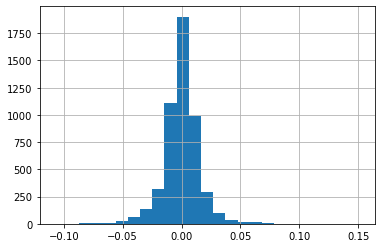

In [31]:
# Check returns
stocks["T"].hist(bins = 25)

## Expected returns, covariances & correlations

Base the expected returns, covariances on historical data. All calculations are on a yearly basis.

In [37]:
# Use average return over the 20yr period as expected return
expected_returns = stocks.sum() / 20

# Calculate expected covariances
expected_covariances = 365 * stocks.cov()

# Calculate expected correlations
expected_correlations = stocks.corr()

In [39]:
expected_correlations

AAPL       ABT       CAT       DUK       EMN       JPM       MCD  \
AAPL  1.000000  0.281531  0.408246  0.221150  0.368445  0.399530  0.301770   
ABT   0.281531  1.000000  0.333049  0.335247  0.342524  0.355906  0.322826   
CAT   0.408246  0.333049  1.000000  0.305731  0.624717  0.544998  0.358840   
DUK   0.221150  0.335247  0.305731  1.000000  0.316931  0.333726  0.327107   
EMN   0.368445  0.342524  0.624717  0.316931  1.000000  0.562114  0.375311   
JPM   0.399530  0.355906  0.544998  0.333726  0.562114  1.000000  0.379015   
MCD   0.301770  0.322826  0.358840  0.327107  0.375311  0.379015  1.000000   
O     0.303509  0.284126  0.401629  0.386775  0.423755  0.547502  0.395361   
PEP   0.267412  0.419146  0.359605  0.432203  0.357771  0.368256  0.388451   
T     0.325846  0.379792  0.421990  0.399256  0.419562  0.482647  0.347237   
XOM   0.339058  0.393368  0.560880  0.442123  0.561110  0.493804  0.401415   

             O       PEP         T       XOM  
AAPL  0.303509  0.267412  0.325846  0.339058  
ABT   0.284126  0.419146  0.379792  0.393368  
CAT   0.401629  0.359605  0.421990  0.560880  
DUK   0.386775  0.432203  0.399256  0.442123  
EMN   0.423755  0.357771  0.419562  0.561110  
JPM   0.547502  0.368256  0.482647  0.493804  
MCD   0.395361  0.388451  0.347237  0.401415  
O     1.000000  0.383139  0.381327  0.430580  
PEP   0.383139  1.000000  0.419824  0.453136  
T     0.381327  0.419824  1.000000  0.497837  
XOM   0.430580  0.453136  0.497837  1.000000